<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Author                25 non-null     object 
 1   year                  25 non-null     int64  
 2   Title                 25 non-null     object 
 3   Type_study            25 non-null     object 
 4   Type_study_clean      24 non-null     object 
 5   Number_species        24 non-null     object 
 6   Number_species_clean  24 non-null     float64
 7   Taxon                 25 non-null     object 
 8   Phenophases           23 non-null     object 
 9   climate_variable      25 non-null     object 
 10  effect_magnitud       24 non-null     object 
 11  Main results          25 non-null     object 
 12  Region                25 non-null     object 
 13  Observations          18 non-null     object 
 14  Opinion               10 non-null     object 
 15  More_information      3 n

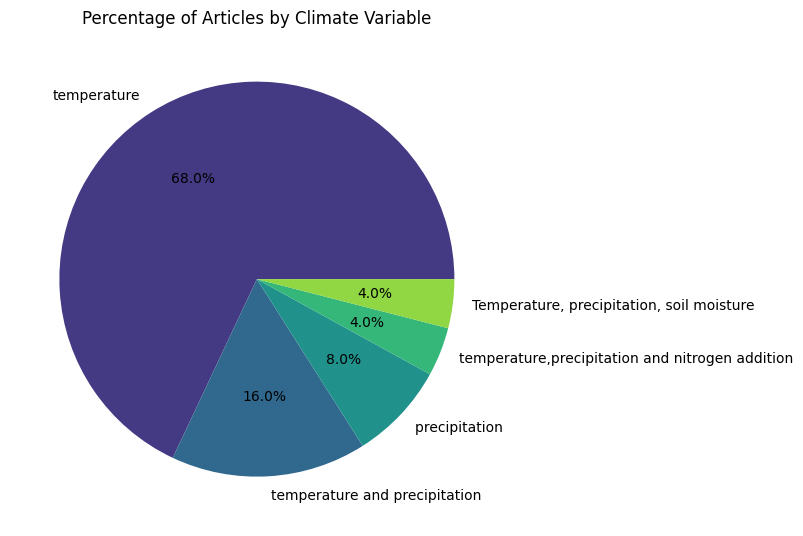

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Read the data
df = pd.read_csv('Excel_info_meta_analisis_full.csv', encoding='latin1')
df.info()
# Normalize text in relevant columns
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
# Calculate the percentage of articles for each climate variable
climate_variable_counts = df['climate_variable'].value_counts(normalize=True) * 100
# Plot a pie chart of the percentage of articles for each climate variable
plt.figure(figsize=(8, 8))
plt.pie(climate_variable_counts, labels=climate_variable_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(climate_variable_counts)))
plt.title('Percentage of Articles by Climate Variable')
plt.tight_layout()
plt.show()

Temperature, or in other words, warming, is the most studied climate variable in meta-analyses or reviews on phenology and climate change (present in 92 % of the articles). Precipitation regimes also tend to be widely, while other environmental variables remain less studied

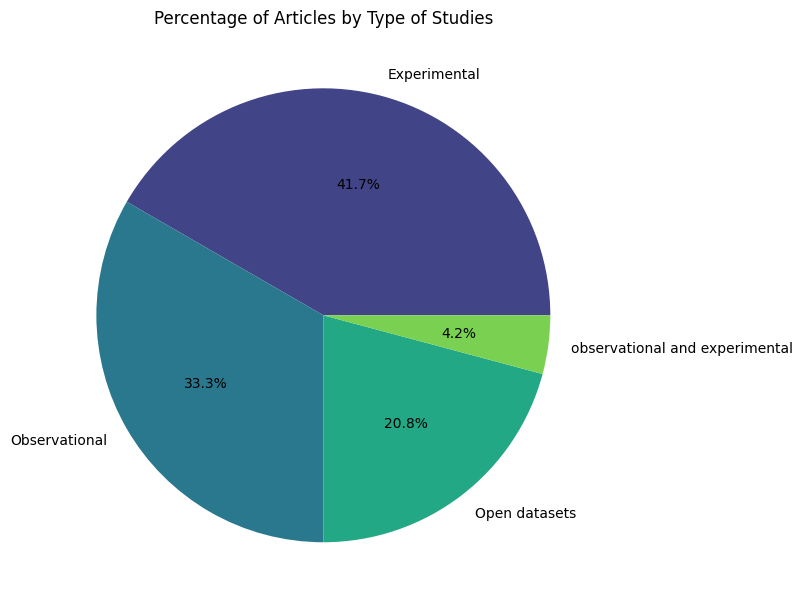

In [12]:
# Calculate the percentage of articles for each type_study_clean
type_study_clean_counts = df['type_study_clean'].value_counts(normalize=True) * 100
# Plot a pie chart of the percentage of articles for each type_study_clean
plt.figure(figsize=(8, 8))
plt.pie(type_study_clean_counts, labels=type_study_clean_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(type_study_clean_counts)))
plt.title('Percentage of Articles by Type of Studies')
plt.tight_layout()
plt.show()

I classified the articles based on the type of study used as primary studies, including observational studies (time series), experimental studies, and open datasets. The articles that used experimental studies were the most represented (almost 42%), followed by those using observational studies and open datasets (21%), and finally, those combining both observational and experimental studies (4.2%, only one article, Wolkovich et al., 2012). 

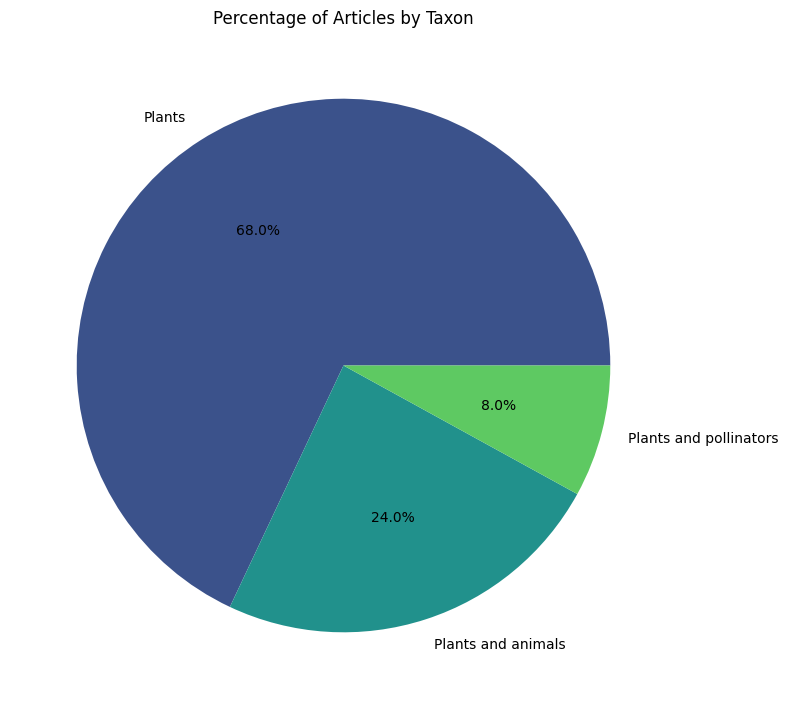

In [9]:
# Calculate the percentage of articles for each taxon
taxon_counts = df['taxon'].value_counts(normalize=True) * 100
# Plot a pie chart of the percentage of articles for each taxon
plt.figure(figsize=(8, 8))
plt.pie(taxon_counts, labels=taxon_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(taxon_counts)))
plt.title('Percentage of Articles by Taxon')
plt.tight_layout()
plt.show()


Plants are the most represented taxon across the articles (68%). The remaining articles examine the phenology of both plants and animals, but only 8% specifically focus on plants and pollinators.

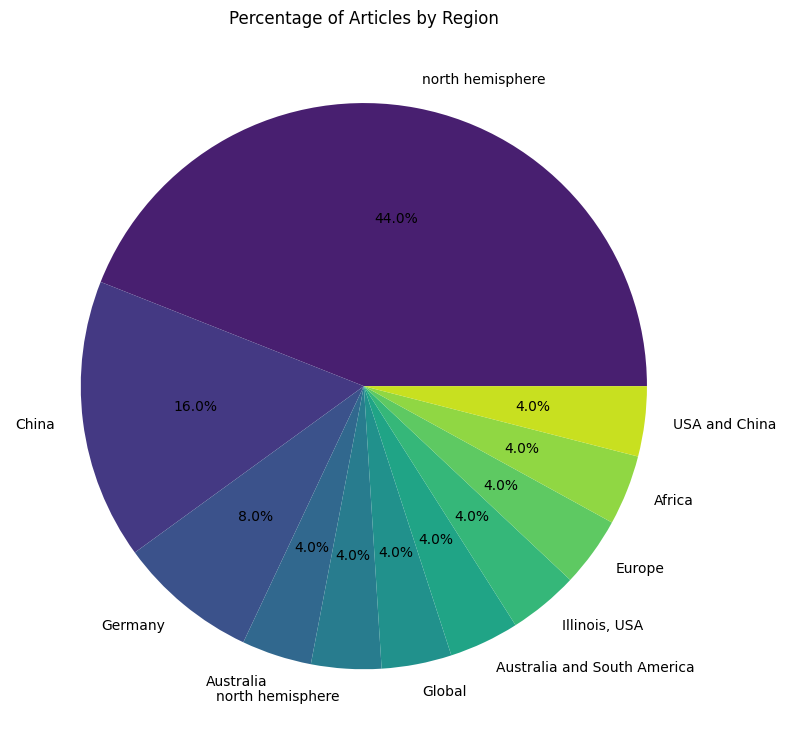

In [14]:
# Calculate the percentage of articles for each region
region_counts = df['region'].value_counts(normalize=True) * 100
# Plot a pie chart of the percentage of articles for each region
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(region_counts)))
plt.title('Percentage of Articles by Region')
plt.tight_layout()
plt.show()

This figure suggests a strong geographical bias in the studies, with most research coming from a limited number of regions, particularly the north hemisphere and China. Only one study incorporate studies from South America. 

C:\Users\vmarq\AppData\Local\Temp\ipykernel_15332\4291919039.py:7: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vmarq\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


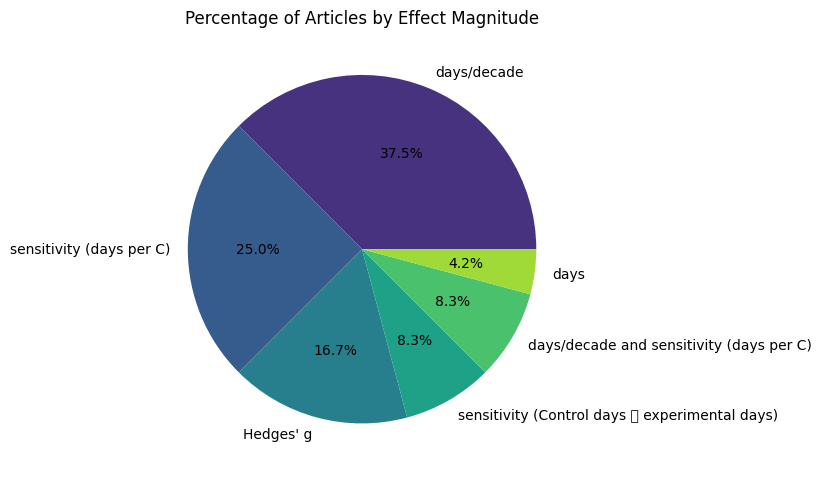

In [7]:
# Calculate the percentage of articles for each effect_magnitud
effect_magnitud_counts = df['effect_magnitud'].value_counts(normalize=True) * 100
# Plot a pie chart of the percentage of articles for each effect_magnitud
plt.figure(figsize=(8, 8))
plt.pie(effect_magnitud_counts, labels=effect_magnitud_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(effect_magnitud_counts)))
plt.title('Percentage of Articles by Effect Magnitude')
plt.tight_layout()
plt.show()

The most commonly used variables to estimate phenological changes were days per decade (present in 37.5% of the articles) and various estimations of sensitivity

C:\Users\vmarq\AppData\Local\Temp\ipykernel_15332\3334000.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')


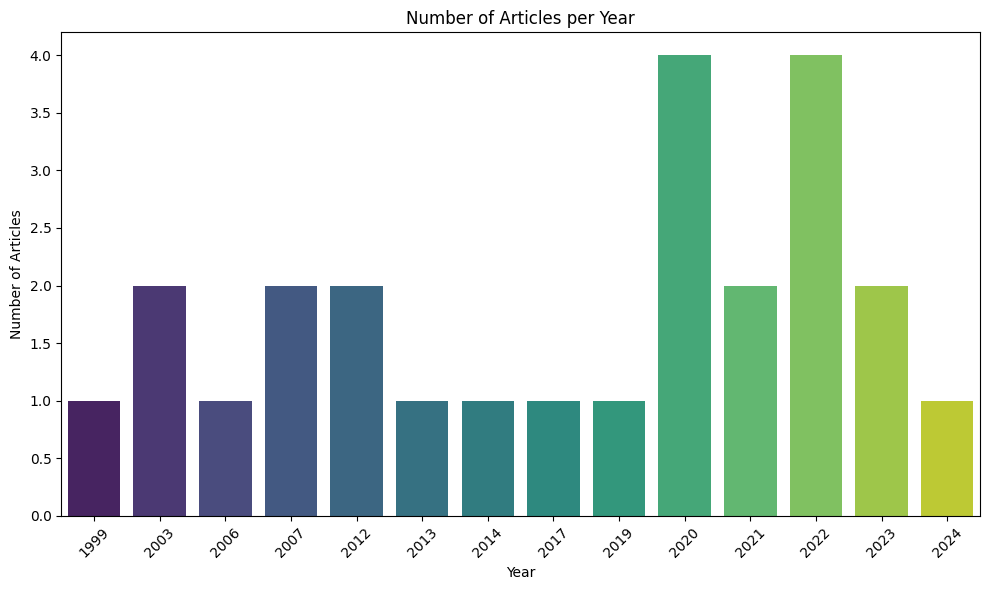

In [8]:
# Bar plot of the number of articles per year
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
plt.title('Number of Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.show()

This graphic suggests growing interest in the research topic, particularly in the past five years. Peaks in 2020 (4 studies) and 2022 (4 studies) could indicate an increase in awareness, funding, or significant advances in methodology.The rise in studies aligns with global trends in ecology and climate change research, where phenology, species interactions, and climate effects are increasingly studied.